# Κατάτμηση εικόνας με τον αλγόριθμο k-means

In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt 


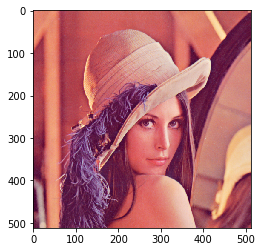

In [11]:
Acolor = np.array(Image.open('lenna.png'))
plt.imshow(Acolor)
plt.show()

Διάσταση εικόνας με χρώμα: (512, 512, 3)
Διάσταση εικόνας με χρώμα: (512, 512)


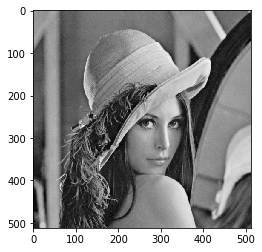

In [13]:
# Κάνω την εικόνα μου gray-scale
print('Διάσταση εικόνας με χρώμα: {}'.format(Acolor.shape))
A = np.mean(Acolor, axis=-1)
print('Διάσταση εικόνας με χρώμα: {}'.format(A.shape))
plt.imshow(A, cmap='gray')
plt.show()

(262144,)


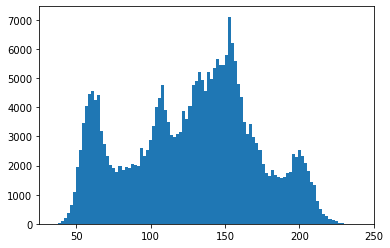

In [21]:
# Αποθηκεύω όλες τις τιμές έντασης σε ένα διάνυσμα. Δηλαδή αν η εικόνα μου είναι μεγέθους MxN,
# X θα έχει μέγεθος ΜΝ χ 1 .
X = A.flatten()
print(X.shape)
plt.hist(X, bins=100)
plt.show()

In [46]:
# Υλοποίηση του k-means
# 
# Αρχικοποίηση παραμέτρων
# 
K = 4 # Αριθμός τμημάτων
N = len(X)  # Αριθμός των εικονοστοιχείων
D = 1 # Διάσταση των δεδομένων (εδώ υποθέτουμε ότι έχουμε μόνο εντάσεις του γκρι, άρα η διάσταση είναι 1)
iterations = 30 # Μέγιστος αριθμός επαναλήψεων του αλγόριθμου
# Αρχικοποίηση των θέσεων των κέντρων σε τιμές 
kentra = np.random.rand(K) * 255
# Εκτύπωση αρχικών κέντρων
for k in range(K):
    print('Αρχική τιμή για κέντρο {}: {}'.format(k, kentra[k]))
for i in range(iterations):
    print('Επανάληψη αρ.{}'.format(i+1))
    # Βήμα ανάθεσης κάθε τιμής σε κέντρο
    apostaseis_shmeiwn_apo_kentra = np.zeros([K, N])
    for k in range(K):
        apostaseis_shmeiwn_apo_kentra[k, :] = (X - kentra[k]*np.ones(N,))**2
        # Αυτό το διάνυσμα θα κρατάει τον αριθμό του κοντινότερου κέντρου για το κάθε σημείο
    kontinotera_kentra = np.argmin(apostaseis_shmeiwn_apo_kentra, axis=0)
    # Βήμα υπολογισμού νέων κέντρων
    for k in range(K):
        times_gia_trexon_tmima = X[kontinotera_kentra == k]
        if(len(times_gia_trexon_tmima) == 0):
            continue
        kentra[k] = np.mean(times_gia_trexon_tmima)
        print('Στο τμήμα {} αντιστοιχούν {} σημεία. Νέος μέσος όρος: {}'.format(k, len(times_gia_trexon_tmima), kentra[k]))

Αρχική τιμή για κέντρο 0: 118.08740494979128
Αρχική τιμή για κέντρο 1: 142.47041164051467
Αρχική τιμή για κέντρο 2: 36.665569085032935
Αρχική τιμή για κέντρο 3: 179.881797170092
Επανάληψη αρ.1
Στο τμήμα 0 αντιστοιχούν 78550 σημεία. Νέος μέσος όρος: 107.64074687035857
Στο τμήμα 1 αντιστοιχούν 81918 σημεία. Νέος μέσος όρος: 146.05132775051476
Στο τμήμα 2 αντιστοιχούν 45469 σημεία. Νέος μέσος όρος: 61.82743554216427
Στο τμήμα 3 αντιστοιχούν 56207 σημεία. Νέος μέσος όρος: 184.7395223607973
Επανάληψη αρ.2
Στο τμήμα 0 αντιστοιχούν 64163 σημεία. Νέος μέσος όρος: 107.85496833585296
Στο τμήμα 1 αντιστοιχούν 97297 σημεία. Νέος μέσος όρος: 146.00461816225922
Στο τμήμα 2 αντιστοιχούν 52122 σημεία. Νέος μέσος όρος: 64.30962613355844
Στο τμήμα 3 αντιστοιχούν 48562 σημεία. Νέος μέσος όρος: 188.13564790027866
Επανάληψη αρ.3
Στο τμήμα 0 αντιστοιχούν 62875 σημεία. Νέος μέσος όρος: 108.31301259111996
Στο τμήμα 1 αντιστοιχούν 99791 σημεία. Νέος μέσος όρος: 146.5126781640295
Στο τμήμα 2 αντιστοιχούν 53410 

(262144,)
(512, 512)


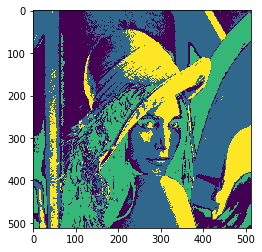

In [51]:
# Εμφάνιση κατάτμησης
# Όλη η πληροφορία που χρειαζόμαστε βρίσκεται στο διάνυσμα 'kontinotera_kentra'
print(kontinotera_kentra.shape)
segmentation = np.reshape(kontinotera_kentra, [512, 512])
print(segmentation.shape)
plt.imshow(segmentation)
plt.show()
# Το αποτέλεσμα θα είναι η κατάτμηση που ζητάμε.
# Κάθε (ψευδο)χρώμα αντιστοιχεί σε διαφορετικό τμήμα.